## Data Science Midterm 1
**Daniel Leskiewicz**

### Imports

In [1]:
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Part 1: Introduction and Background

Do we have to explain the adavantages and disadvantages of the population and estimatation methods

To start, all of the three species(Bobcats, Coyotes, Gray Foxes) are found within the United States. A motivational reason to track these species is to get a good sense of where they are located, and within a location, ecologists can gather data on what they eat and etc. Furthermore, bobcats, coyotes, and gray foxes are at a level of least concerned by the IUNC. The gray fox has it a bit tougher than bobcats and coyotes because they are more prone to being attacked by these two other species because they all fight for the same type of food. They are not known for attacking humans or endangering humans and typically reside away from the human territory. They have some food security risks because of the competition between these two other species. Coyotes are potentially dangerous to pets and humans with some records of encountering with attacking humans and pets on the sidewalk or streets but don't seem to have any risk of food security. Lastly, bobcats are unlikely to attack humans because they are mostly timid and solitary animals that don't create conflict. They do not have any food security issues as well. 

The motivation behind using scat samples for estimating population sizes is because we can identify a particular species DNA amplification of the scat sample to allow ecologists to treat reoccurrences of a genotype and record this type of information to make then "mark-recapture" models to estimate population size based on the genotype. So overall, it is used to it is an accurate way of determining a particular region's population of a specific species. 


The hypothesis is: The difference in the biogeochemical and morphological traits of scat samples make it possible for ecologists to distinguish between scats of different species such as coyotes, bobcats, and gray foxes.  

### Part 2: Analysis

Reading in the dataset

In [2]:
data = pd.read_csv("Dataset_BobcatsCoyotesFoxes.csv")

Display the dataset

In [3]:
data.head()

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,Ropey,Segmented,Flat,Scrape
0,Coyote,January,2012,YOLA,Edge,5,2,9.5,25.7,41.9,1.63,15.89,-26.85,6.94,8.5,0,0,0,0
1,Coyote,January,2012,YOLA,Edge,3,2,14.0,25.4,37.1,1.46,17.61,-29.62,9.87,11.3,0,0,0,0
2,Bobcat,January,2012,YOLA,Middle,3,2,9.0,18.8,16.5,0.88,8.40,-28.73,8.52,8.1,1,1,0,1
3,Coyote,January,2012,YOLA,Middle,5,2,8.5,18.1,24.7,1.36,7.40,-20.07,5.79,11.5,1,0,0,0
4,Coyote,January,2012,YOLA,Edge,5,4,8.0,20.7,20.1,0.97,25.45,-23.24,7.01,10.6,0,1,0,0


Formatting the data and creating categories

In [4]:
data = data.fillna(0)
data['Ropey'] = data['Ropey'].map(lambda x: x==1)
data["Segmented"] = data["Segmented"].map(lambda x: x==1)
data["Flat"] = data["Flat"].map(lambda x: x==1)
data["Scrape"] = data["Scrape"].map(lambda x: x==1)
data['Species'] = data['Species'].astype("category")
data['Month'] = data['Month'].astype("category")
data['Year'] = data['Year'].astype("category")
data['Location'] = data['Location'].astype("category")

Displaying the Columns and the data types of the columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
Species      110 non-null category
Month        110 non-null category
Year         110 non-null category
Site         110 non-null object
Location     110 non-null category
Age          110 non-null int64
Number       110 non-null int64
Length       110 non-null float64
Diameter     110 non-null float64
Taper        110 non-null float64
TI           110 non-null float64
Mass         110 non-null float64
d13C         110 non-null float64
d15N         110 non-null float64
CN           110 non-null float64
Ropey        110 non-null bool
Segmented    110 non-null bool
Flat         110 non-null bool
Scrape       110 non-null bool
dtypes: bool(4), category(4), float64(8), int64(2), object(1)
memory usage: 11.1+ KB


| Morphological | Biogeochemical | Contextual | Not a Trait |
| ---- | ---- | ----- | ---- |
|Length| d13c |Location|Species|
|Diameter | d15n |Scrape|  |
|Ropey | CN |Month|  |
|Segmented| |Year|  |
|Flat |  |  |
|Taper|  |  |  |
|Mass|  |  |  |
|TI|  |  |   |
|Number of Scat| |  |  |
|Age|

Creating a count variable so I can use it for statistical testing later in the notebook

In [6]:
data['count'] = 1

### Performing visualization and statistical testing to evaluate the relationship between the morphological and biogeochemical traits and species

#### Doing Morphological Trait Visualization and Statistical Tests

Length vs Species Boxplots and Kruskal-Wallis Test

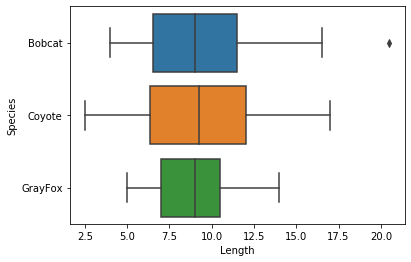

In [7]:
sns.boxplot(x=data['Length'], y=data['Species'], data=data)

In [8]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['Length'][mask])
statistics, length_pvalue = stats.kruskal(*species_samples)
print('Length p-value: ' + str(length_pvalue))

Length p-value: 0.9180671669942299


Diameter vs Species Boxplots and Kruskal-Wallis Test

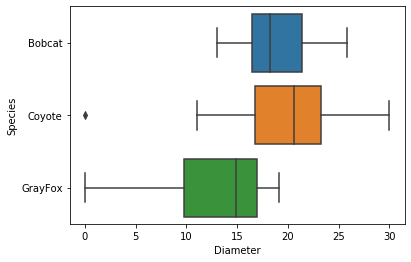

In [9]:
sns.boxplot(x=data['Diameter'], y=data['Species'], data=data)

In [10]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['Diameter'][mask])
statistics, diameter_pvalue = stats.kruskal(*species_samples)
print('Diameter p-value: ' + str(diameter_pvalue))

Diameter p-value: 7.716544828634403e-07


Mass vs Species Boxplots and Kruskal-Wallis Test

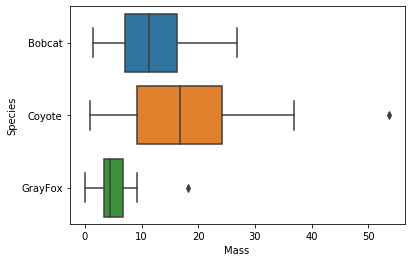

In [11]:
sns.boxplot(x=data['Mass'], y=data['Species'], data=data)

In [12]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['Mass'][mask])
statistics, mass_pvalue = stats.kruskal(*species_samples)
print('Mass p-value: ' + str(mass_pvalue))

Mass p-value: 7.493259614251413e-08


TI vs Species Boxplots and Kruskal-Wallis Test

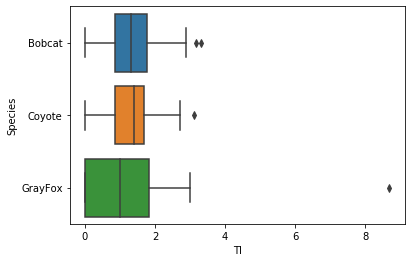

In [13]:
sns.boxplot(x=data["TI"], y=data["Species"])

In [14]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['TI'][mask])
statistics, mass_pvalue = stats.kruskal(*species_samples)
print('Mass p-value: ' + str(mass_pvalue))

Mass p-value: 0.4160523041273989


Number vs Species Boxplots and Kruskal-Wallis Test

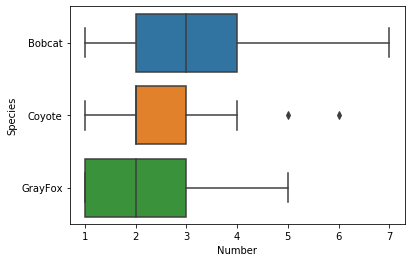

In [15]:
sns.boxplot(x=data['Number'], y=data["Species"])

In [16]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['Number'][mask])
statistics, number_pvalue = stats.kruskal(*species_samples)
print('Number p-value: ' + str(number_pvalue))

Number p-value: 0.018104366301782103


Taper vs Species Boxplots and Kruskal-Wallis Test

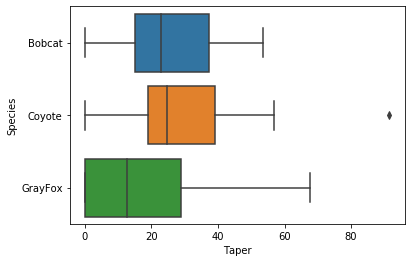

In [17]:
sns.boxplot(x=data['Taper'], y=data['Species'])

In [18]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['Taper'][mask])
statistics, Taper_pvalue = stats.kruskal(*species_samples)
print('Taper p-value: ' + str(mass_pvalue))

Taper p-value: 0.4160523041273989


Species vs Age Heatmap and Chi-square Test

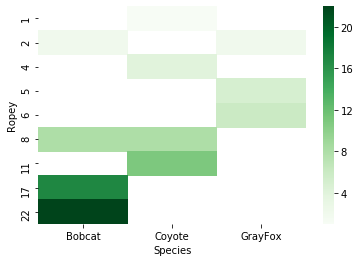

In [19]:
data2 = data.groupby(['Species','Age']).count()
table1 = pd.pivot_table(data2, 'count', 'Ropey', 'Species')
sns.heatmap(table1, cmap='Greens')

In [20]:
combination_counts = data[['Species', 'Age']]\
                    .groupby(by=['Species', 'Age'])\
                    .size().unstack(level=0).fillna(0)
chi2, age_pValue, _, _ = stats.chi2_contingency(combination_counts)
print('Age p-value: ' + str(age_pValue))

Age p-value: 0.8706095622530621


Species vs Ropey Heatmap and Chi-square Test

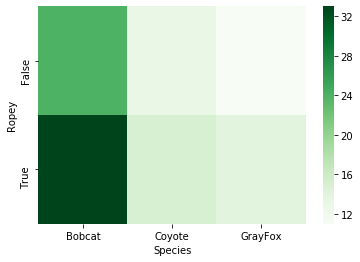

In [21]:
data2 = data.groupby(['Species','Ropey']).count()
table1 = pd.pivot_table(data2, 'count', 'Ropey', 'Species')
sns.heatmap(table1, cmap='Greens')

In [22]:
combination_counts = data[['Species', 'Ropey']]\
                    .groupby(by=['Species', 'Ropey'])\
                    .size().unstack(level=0).fillna(0)
chi2, ropey_pValue, _, _ = stats.chi2_contingency(combination_counts)
print('Ropey p-value: ' + str(ropey_pValue))

Ropey p-value: 0.9303303236624929


Species vs Segmented Heatmap and Chi-square Test

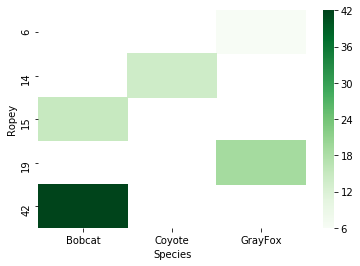

In [23]:
data2 = data.groupby(['Species','Segmented']).count()
table1 = pd.pivot_table(data2, 'count', 'Ropey', 'Species')
sns.heatmap(table1, cmap='Greens')

In [24]:
combination_counts = data[['Species', 'Segmented']]\
                    .groupby(by=['Species', 'Segmented'])\
                    .size().unstack(level=0).fillna(0)
chi2, segmented_pValue, _, _ = stats.chi2_contingency(combination_counts)
print('Segmented p-value: ' + str(segmented_pValue))

Segmented p-value: 0.0001197504633050821


Species vs Flat Heatmap and Chi-square Test

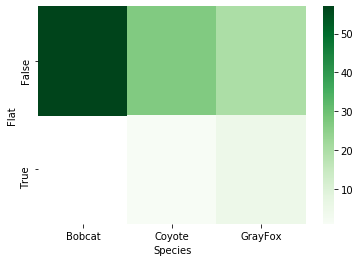

In [25]:
data2 = data.groupby(['Species','Flat']).count()
table1 = pd.pivot_table(data2, 'count', 'Flat', 'Species')
sns.heatmap(table1, cmap='Greens')

In [26]:
combination_counts = data[['Species', 'Flat']]\
                    .groupby(by=['Species', 'Flat'])\
                    .size().unstack(level=0).fillna(0)
chi2, flat_pValue, _, _ = stats.chi2_contingency(combination_counts)
print('flat p-value: ' + str(flat_pValue))

flat p-value: 0.0010398235824743704


### Biogeochemical Visualization and Statistical Testing 

d13C vs Species Boxplots and Kruskal-Wallis Test

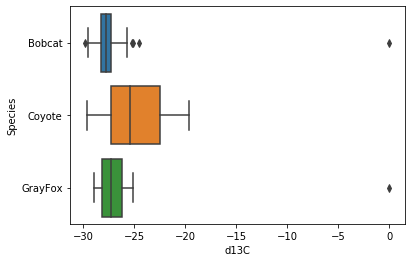

In [27]:
sns.boxplot(x=data["d13C"], y=data["Species"])

In [28]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['d13C'][mask])
statistics, d13C_pvalue = stats.kruskal(*species_samples)
print('d13C p-value: ' + str(d13C_pvalue))

d13C p-value: 0.00010494330754416943


d15N vs Species Boxplots and Kruskal-Wallis Test

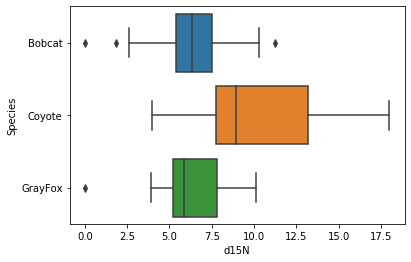

In [29]:
sns.boxplot(x=data["d15N"], y=data["Species"])

In [30]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['d15N'][mask])
statistics, d15N_pvalue = stats.kruskal(*species_samples)
print('d15N p-value: ' + str(d15N_pvalue))

d15N p-value: 1.5507068994128883e-06


C:N vs Species Boxplots and Kruskal-Wallis Test

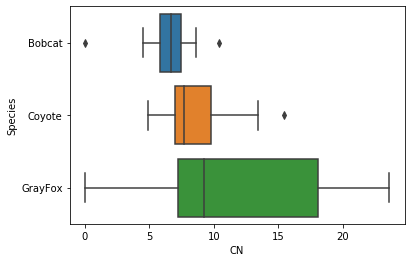

In [31]:
sns.boxplot(x=data["CN"], y=data["Species"])

In [32]:
species_samples = []
for value in set(data['Species']):
    mask = data['Species'] == value
    species_samples.append(data['CN'][mask])
statistics, cn_pvalue = stats.kruskal(*species_samples)
print('C:N p-value: ' + str(cn_pvalue))

C:N p-value: 3.4513884918855206e-07


## Part 3: Discussion and Interpretation

Getting data such as standard deviation, mean and mode for each species

In [33]:
data_bobcat = data[data['Species'] == 'Bobcat']
data_coyote = data[data['Species'] == 'Coyote']
data_gf = data[data['Species'] == 'GrayFox']
#print(data_bobcat.median())
#print(data_gf.std())

|Predictive Trait| P-Value| Gray Fox Mean ± standard deviation | Coyote Mean ± standard deviation | Bobcat Mean ± standard deviation|Gray Fox Median|Coyote Median|Bobcat Median| 
| ---- | ---- | ----- | ---- | ----- | ----- | ------ |-----|
|C:N Ratio|3.4513884918856254e-07|11.6360 ± 6.0128|8.592857 ± 6.0128|6.588947 ± 1.408948|9.20|7.700|6.70 | | | | | | | | 
|Diameter|7.716544828634403e-07|11.9760 ± 6.747|19.542857 ± 6.747|19.008772 ± 2.947049|14.90|20.650|18.20| | | | | | | |
|Mass|7.493259614251413e-08|5.4108 ± 3.4949 |18.2453 ± 3.495|12.482105 ± 6.534607|4.40|16.750|11.25| | | | | | | |
|Segmented|0.0001197504633050821|0.2400 ± 0.436|0.500000 ± 0.4359|0.736842 ± 0.444262|||| | | | | | | |

Explaining how these traits in the chart, show differences in traits and how they relate to the three species.

To start, C: N is depended on the type of foods that the species eats. For example, bobcats have the lowest C: N ratio because they are hypercarnivores which means they solely depend on animal flesh for their nutrient requirement. Meanwhile, the gray foxes and coyotes add more plants and a variety of fruits into their diet. The C: N ratios seem higher as a result.

The coyotes had the biggest diameter scat from the table, followed closely second by bobcats and then gray foxes for the diameter trait. By observing the mass of each animal's scat, we can see that gray foxes have the lowest value for their mass, followed by bobcats and then coyotes with the largest mass. This shows that the lower the value of the mass of the scat, the smaller the diameter it will be; meanwhile, coyotes and bobcats have more mass, resulting in a bigger diameter.

For the Mass trait, this is similar to diameter, but coyotes are the largest, so they have the heaviest scat out of the other two species. The bobcat has the second heaviest species with the double heaviest scat, and the gray fox-like described in the diameter trait have the lightest scats.

For the Segmented trait, from several readings, I can assume that the diet of the species is strongly correlated to the type of scat they will have. It seems like the animals with an omnivore diet are less likely to have segmented scat; meanwhile, carnivores species have more segmented scat. 

Explaining why you think that predictive morphological and biogeochemical might be more useful than contextual traits to ecologists.

First, I think that the morphological and biogeochemical might be more beneficial because using traits such as location, scrape, month, and year doesn't give us any measurement or something to create a model from. The information would be too little or too weak to make accurate assumptions of the scat. Also, contextual traits are straightforward to have a different result because of weather conditions and other environmental factors. Meanwhile, with morphological and biogeochemical characteristics, we can statistically show the difference between the bobcat, coyote, and gray fox, and get enough information out of it to create a model and observe some correlation or differences between the species, all you would have to do is collect the scat and analyze it at a lab and record data. This is why morphological and biogeochemical are more critical and valuable for ecologists than using contextual traits.

### Part 4: Conclusion

From the visualization and statistical testing that was done we can see that the morphological and biogeochemical traits of the three species are likely to be separated and classified by their scat decently. The traits that I thought that helped the most with distinguishing the species by their scat was the CN ratio, Diameter, Mass, and if the scat was segemented or not. To continue this work a person would go and create a un-supervised learning model with these traits to predict a specific specie by just their scat. This model would overall make the jobs of the ecologists easier like described in the previous part to classify between bobcats, coyotes and gray foxs which would save them time and money overall.

### Sources

Scatology: https://egret.org/sites/default/files/scat.pdf


Bryson, Scat Identification: https://www.thinktrees.org/wp-content/uploads/2019/03/Scat-Identification.pdf


Rasmussen, How Biologists Estimate Populations of Animals: http://www.adfg.alaska.gov/index.cfm?adfg=wildlifenews.view_article&articles_id=814


Widlife Management, Estimating Wildlife Populations: https://projects.ncsu.edu/cals/course/fw353/Estimate.htm


Wikipedia, Coyotes: https://en.wikipedia.org/wiki/Coyote


Wikipedia, Gray Foxes: https://en.wikipedia.org/wiki/Gray_fox


Wikipedia, Bobcats: https://en.wikipedia.org/wiki/Bobcat



